# EDA : Bivariate Analysis

## Objective : To demonstrate structured format of Performing Exploratory data Analysis.

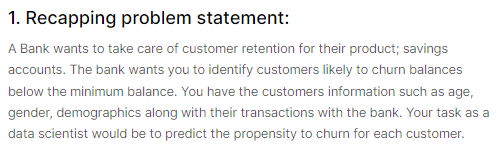

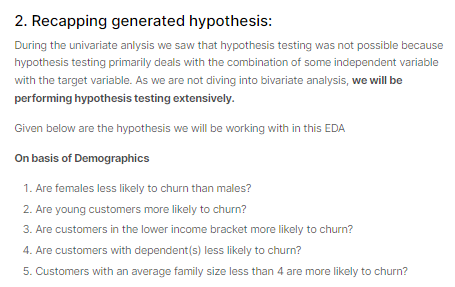

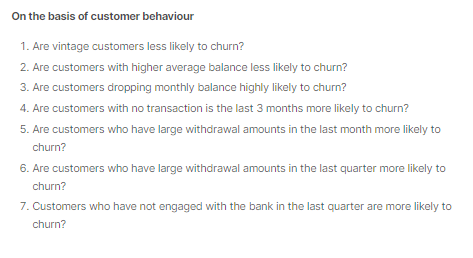

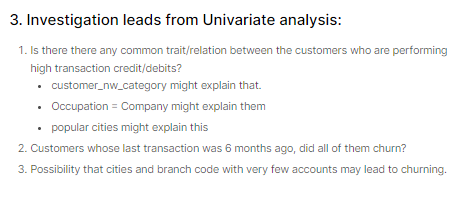

## 4. Importing libraries + Datset + Variable identification and typecasting

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

#importing data
data = pd.read_csv('C:\\Users\\Indian\\Desktop\\Projects\\UNIVARIATE ANALYSIS\\Banking_churn_prediction.csv')

# converting churn/brnch_code/customer_nw_category to category type
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

##### extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

# Removing the original datetime column
data = data.drop(columns = ['last_transaction'])


#dropping customer_id
data = data.drop(columns=['customer_id'])

#checking
data.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran                        float64
dtype: obje

In [3]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

## 5. Bivariate Analysis : Numerical-Numerical

In this section we will be performing bivariate analysis for the Numerical Numerical combination of variables.

Although we do not have have any hypothesis which falls under this combination of variables, but we will still perform the numerical numerical bivariate analysis and relation between the independent variables can be used during the preprocessing and feature engineering.

In [4]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

## Correlation Matrix

A straight forward goto method is to print the correlation matrix.

In [5]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
vintage,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.010040,-0.001359,-0.009683
age,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.000501,0.011970,-0.020895
dependents,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.034460,0.077978,-0.001702
current_balance,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,-0.008980,0.033127,-0.000315
previous_month_end_balance,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.000946,0.023485,0.002033
average_monthly_balance_prevQ,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,-0.000577,0.020949,0.000647
average_monthly_balance_prevQ2,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,-0.012720,0.009123,-0.002463
current_month_credit,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.008664,0.030267,0.000752
previous_month_credit,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.016762,0.066691,-0.006657
current_month_debit,-0.004899,0.025366,0.006784,0.075149,0.100379,0.091491,0.098455,0.941455,0.160198,1.000000,0.160895,0.114887,0.086993,0.037634,0.016997,0.036272,0.000567


### As number of variables are too large, correlation matrix is not much help.

## Heatmap
Heatmap will allow us to visually figure out the key correlation between variables and filter the down the essential variables so that we will have lesss to deal with during the scatter plots.

In order to have different perspectives on the correlation of the independent variables, we will be plotting the heatmaps using three methods of calculating the correlation.

1.Pearson Correlation (cont vs  cont varibles)

2.Kendal's (discret vs discret variables)

3.Spearman Correlation (discret vs discret variables)

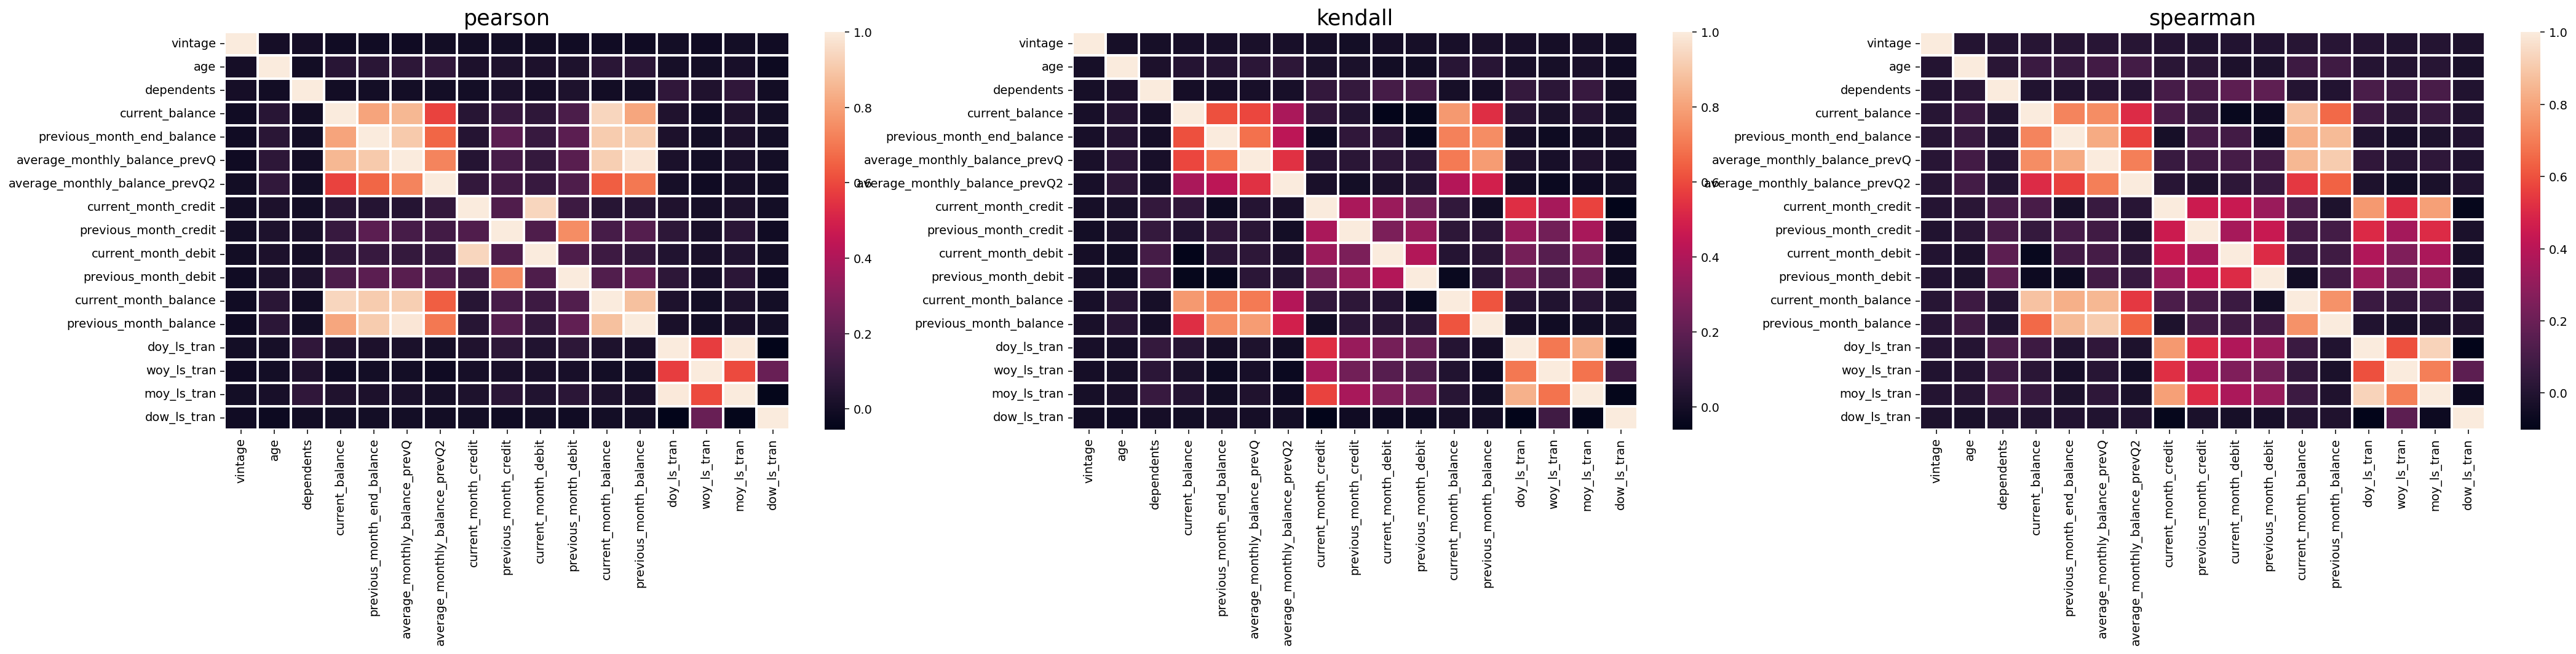

In [6]:
# plotting heatmap usingl all methods for all numerical variables (peason, kendall, spearman)
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

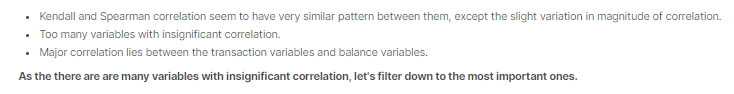

In [7]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

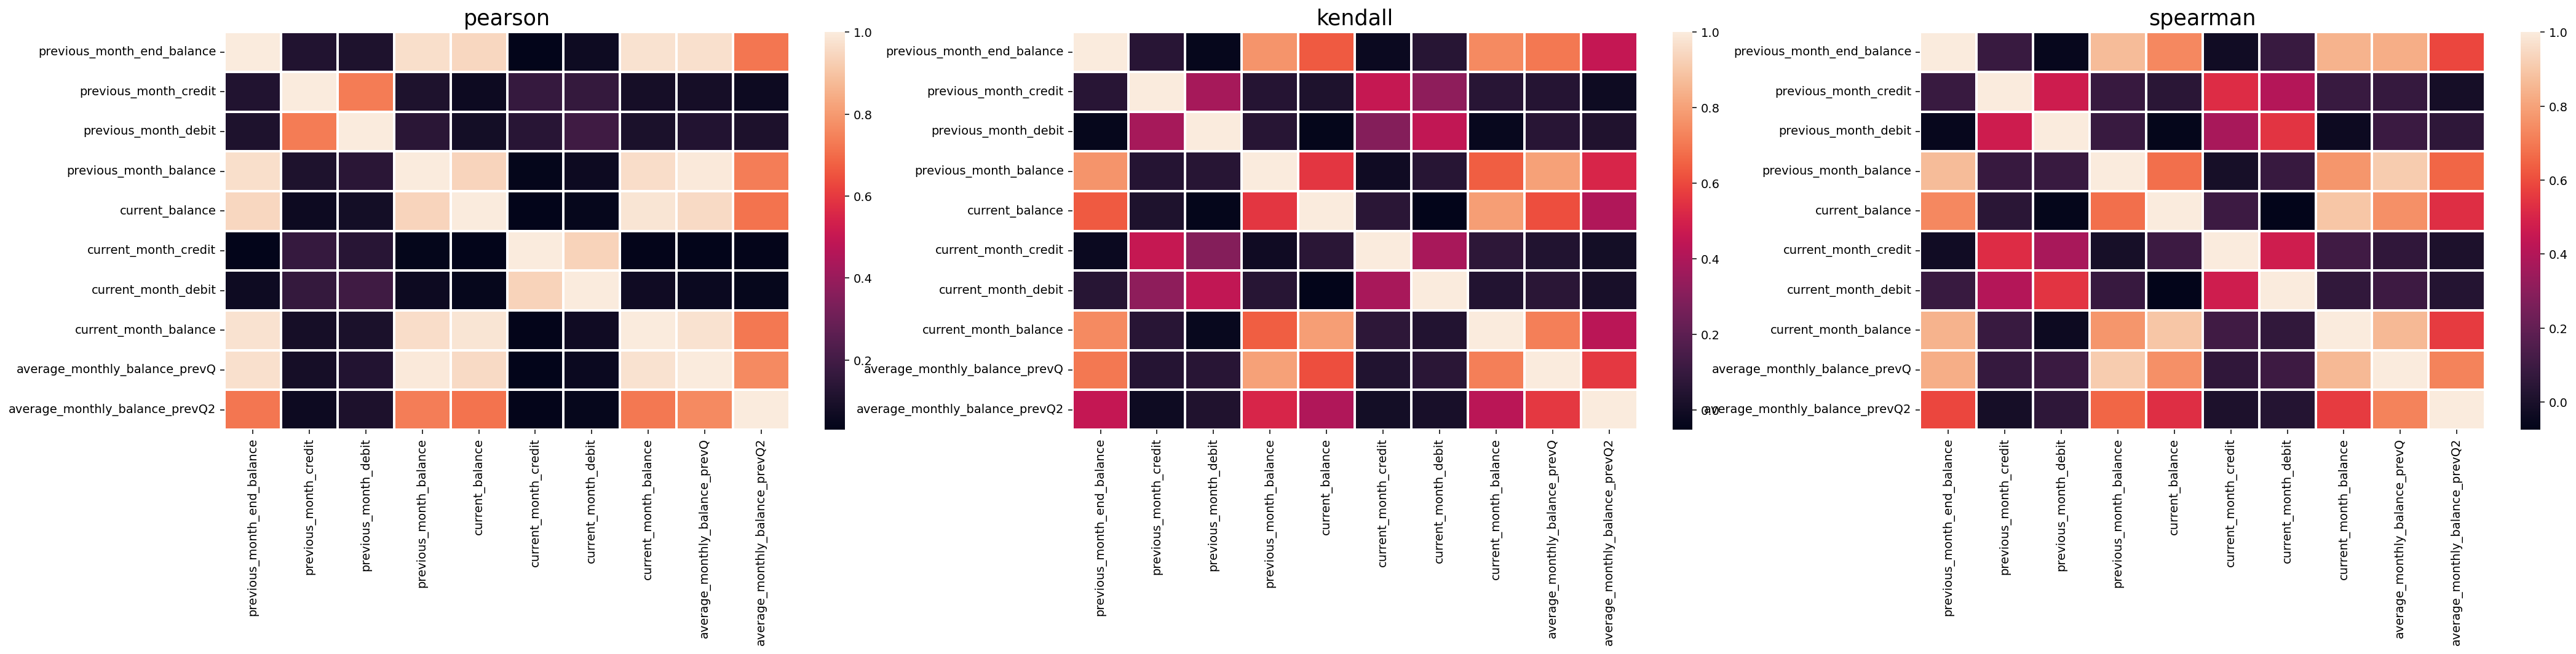

In [8]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

## SUMMARY 

1.)Transaction variables like credit/debit have a strong correlation among themselves.

2.)Balance variables have strong correlation among themselves.

3.)Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.

## Scatter Plot

Now that we have a bird's eye view of the correlations, let's look over them closely with the help of scatter plots.

In [9]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [ ]:
# scatter plot for transactional variables
plt.figure(dpi=100)
sns.pairplot(numerical[transactions])
plt.show()

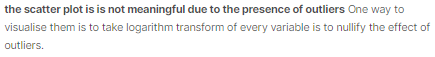

In [10]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

# 6. Bivariate Analysis: Continuous-Categorical u to plot the categorical mean and the categorical distribution.

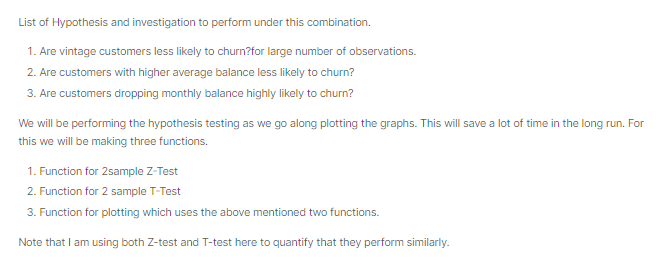

In [11]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [12]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [13]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (20,4), dpi=140)
  
  #barplot
  plt.subplot(1,3,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # category-wise distribution
  plt.subplot(1,3,2)
  sns.kdeplot(x1, shade= True, color='blue', label = 'churned')
  sns.kdeplot(x2, shade= False, color='green', label = 'not churned', linewidth = 1)
  plt.title('categorical distribution')
    
  # boxplot
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

## 6.1 Are vintage customers less likely to churn?

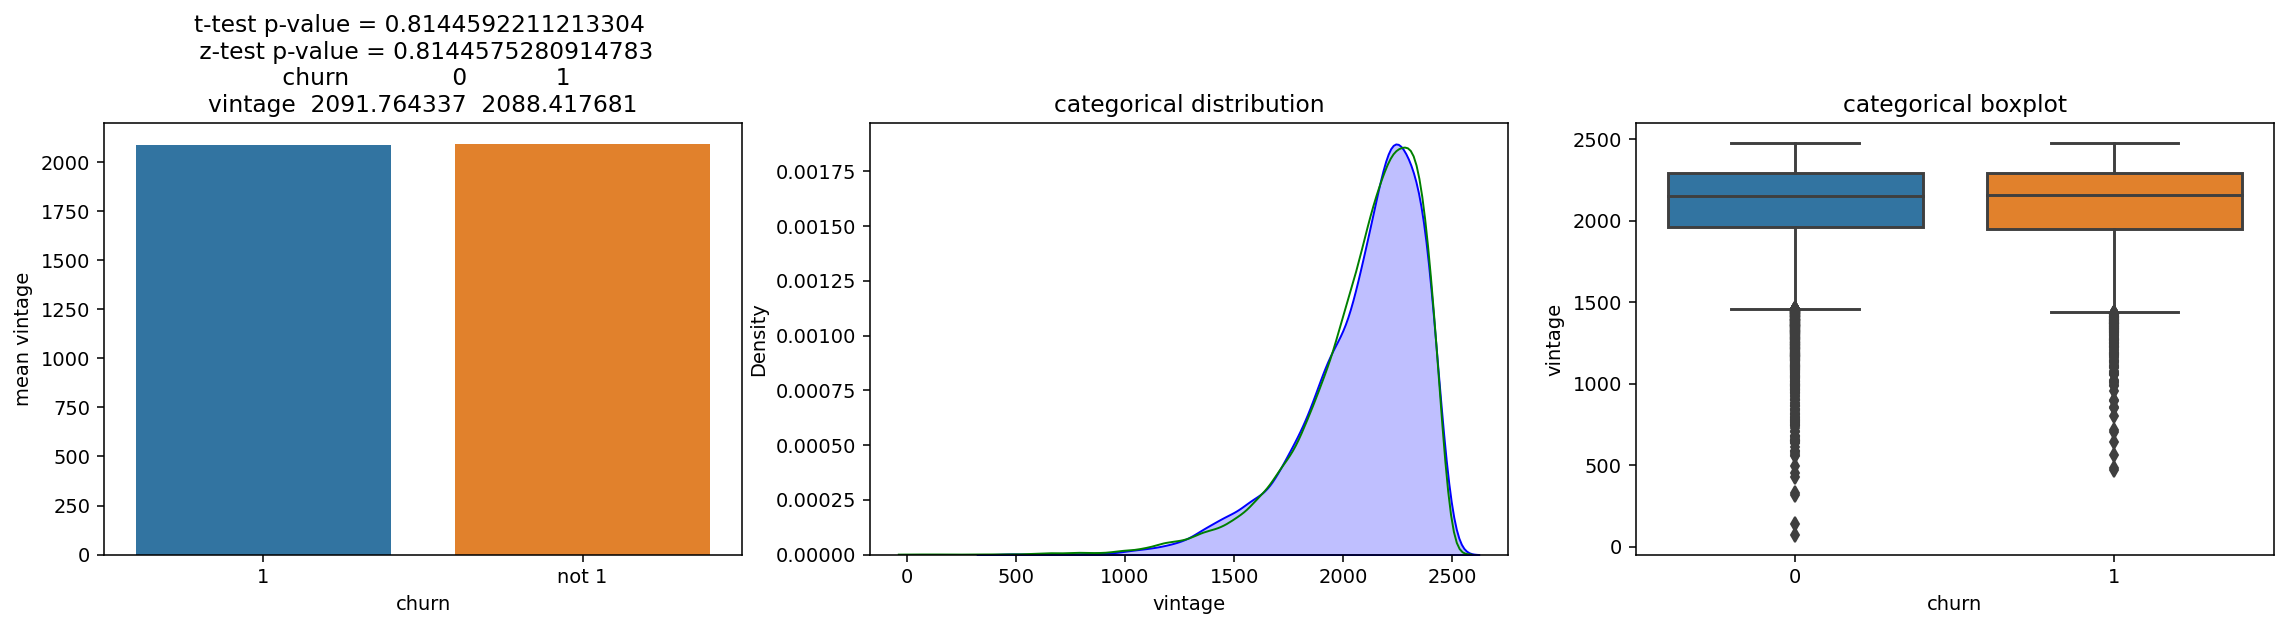

In [15]:
Bivariate_cont_cat(data, 'vintage', 'churn', 1)

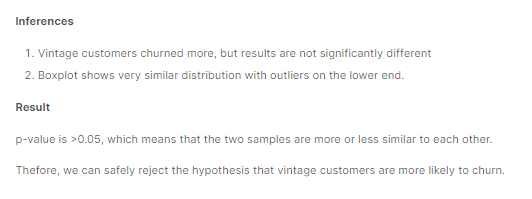

## 6.2 Are customers with higher average balance less likely to churn?

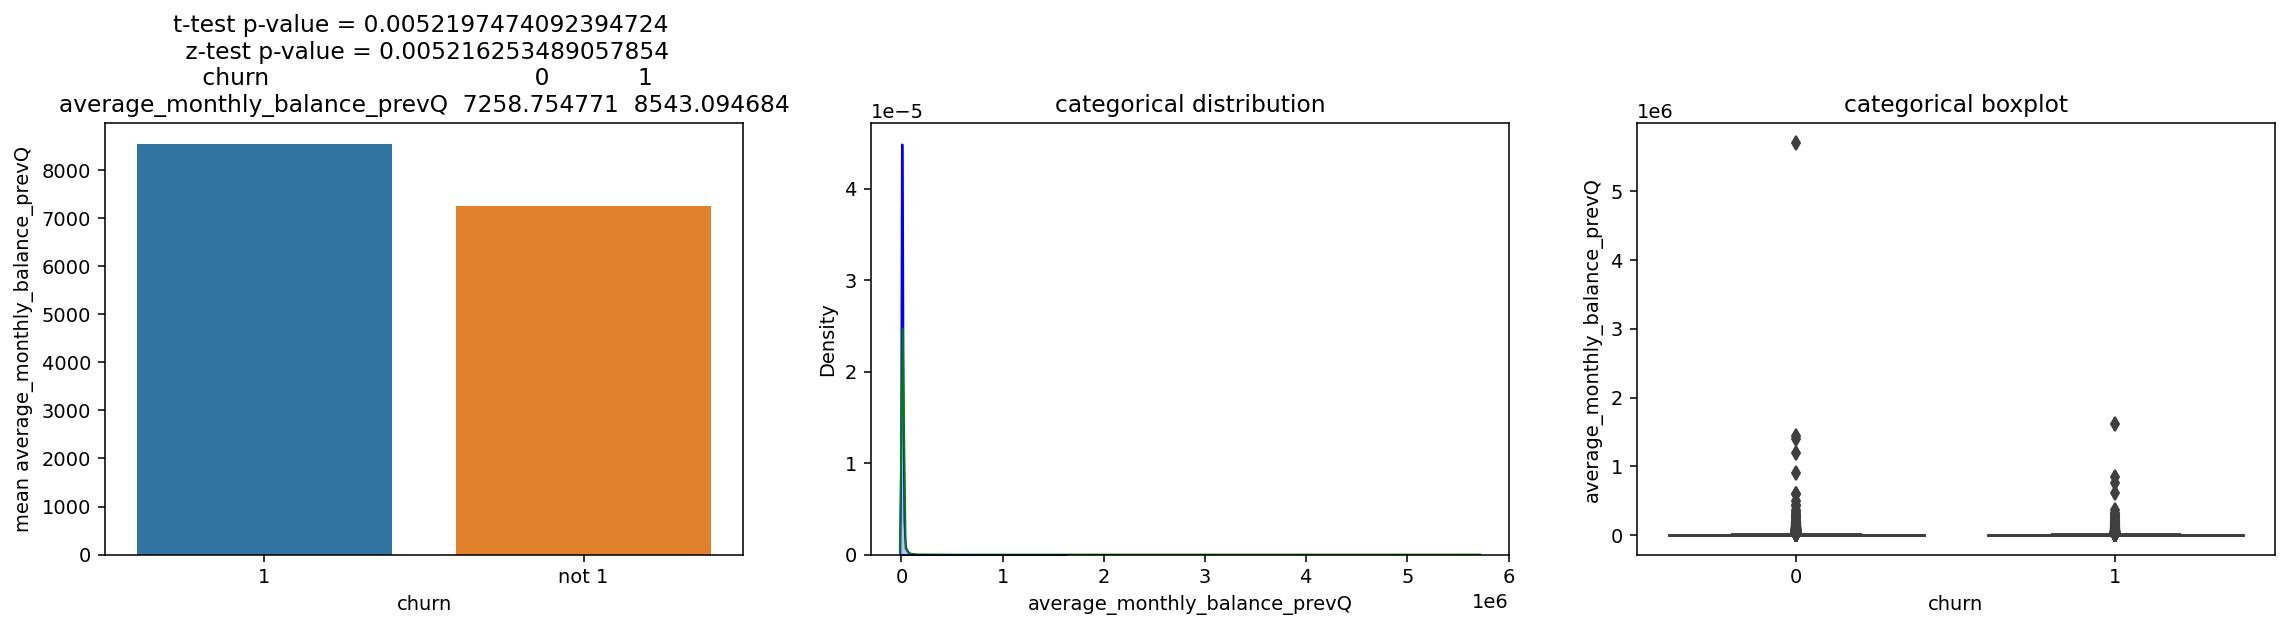

In [16]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ', 'churn', 1)

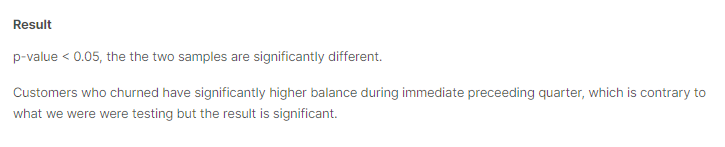

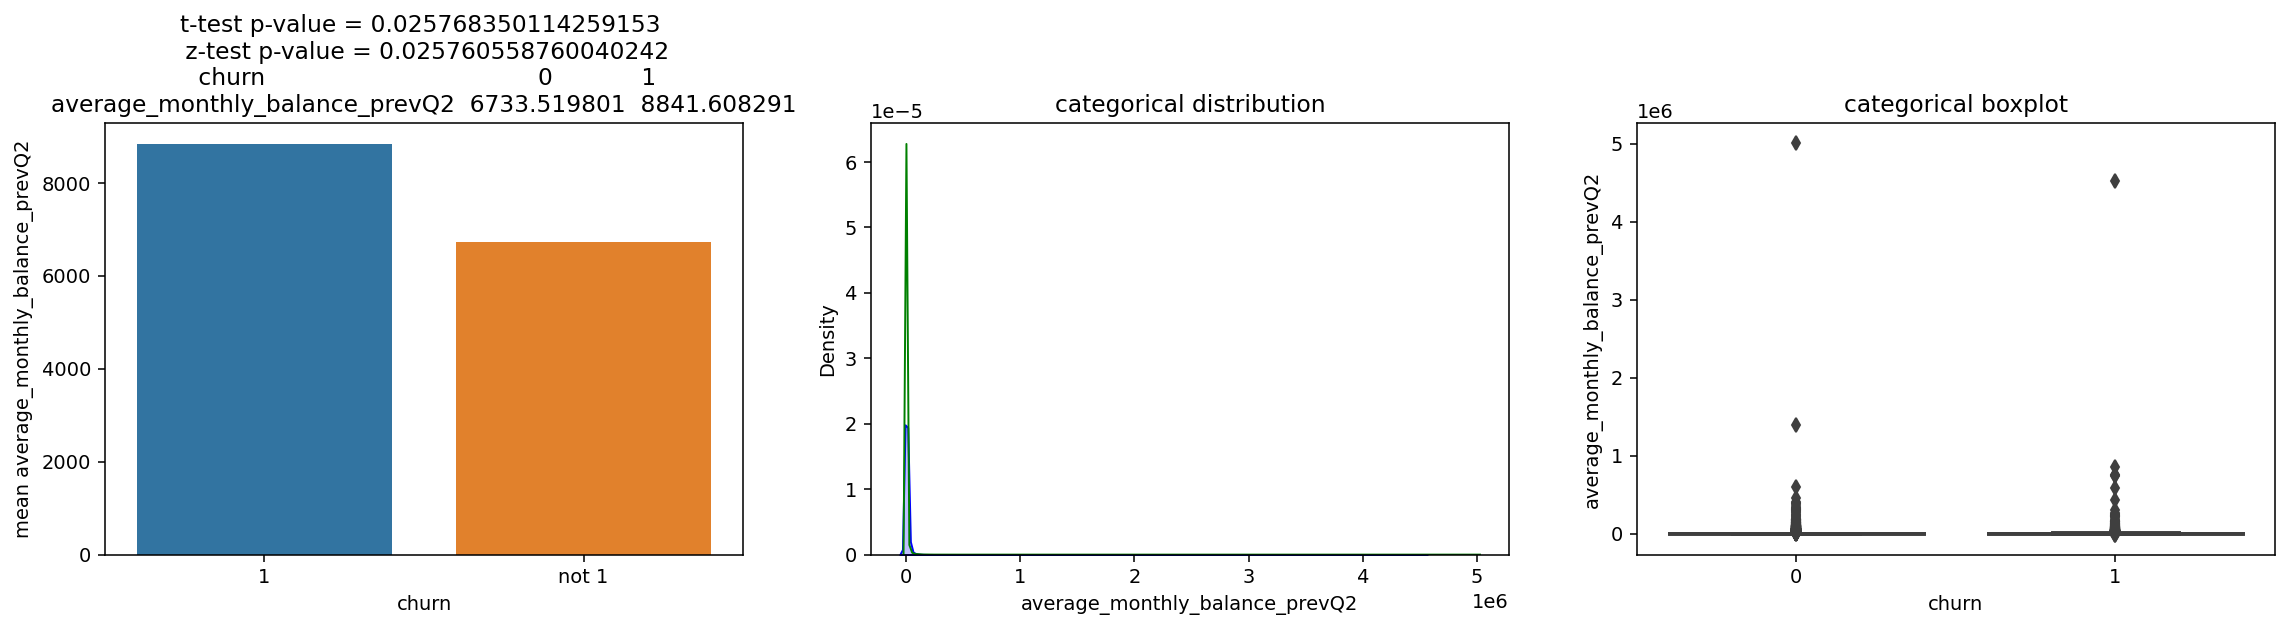

In [17]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ2', 'churn', 1)

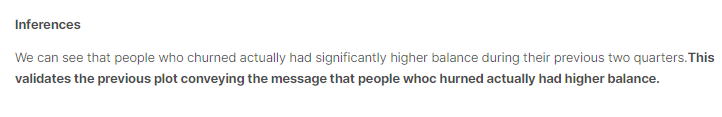

## previous month/current month

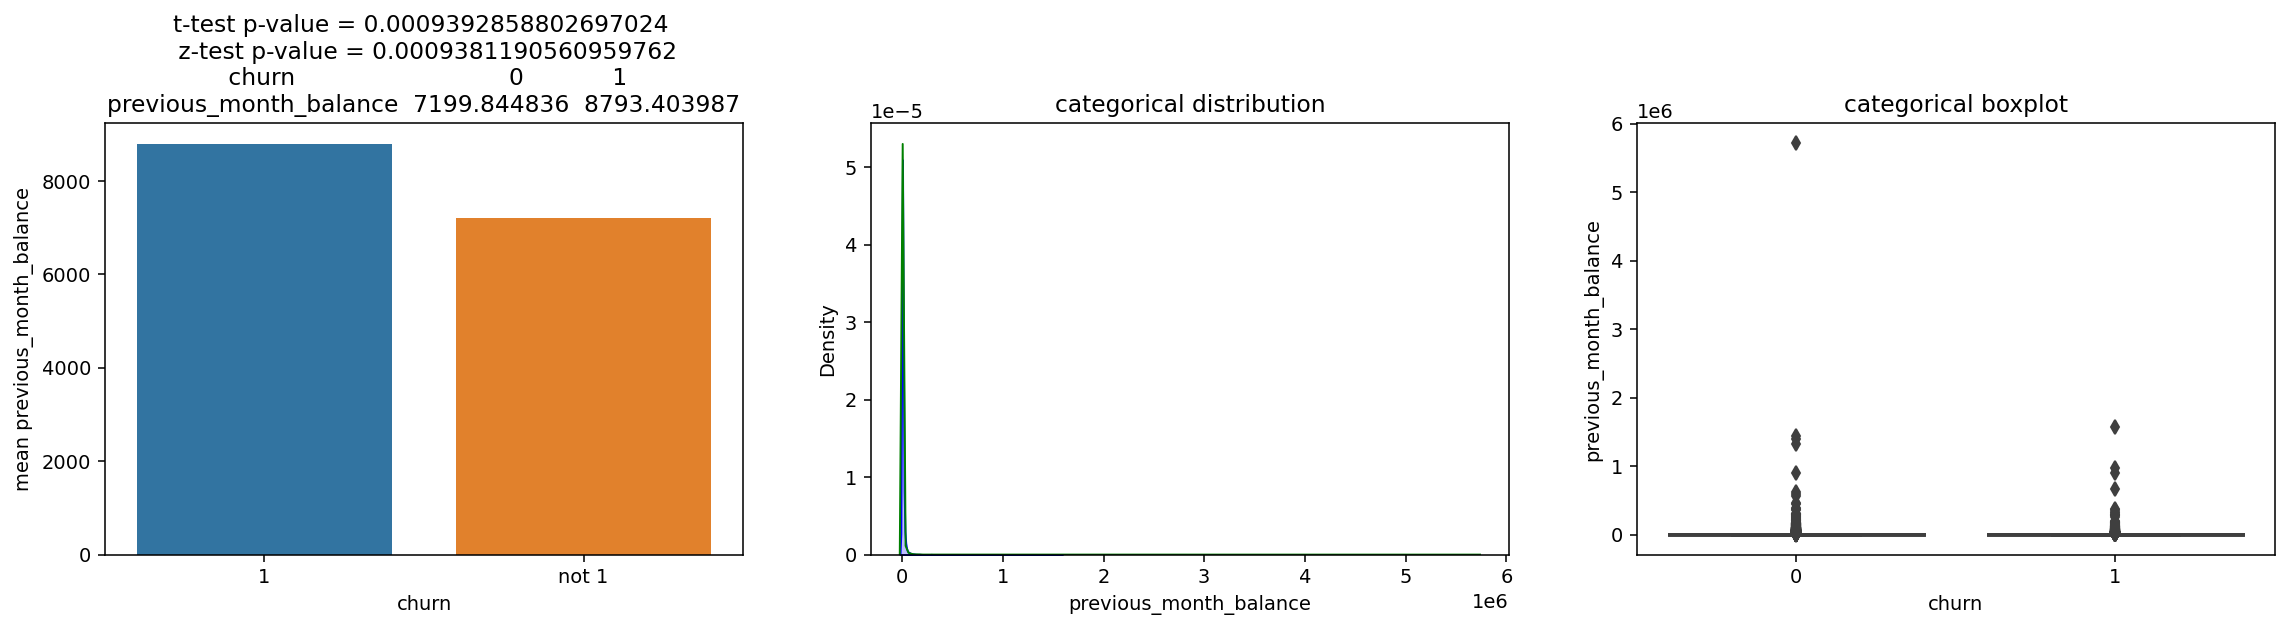

In [18]:
Bivariate_cont_cat(data, 'previous_month_balance', 'churn', 1)

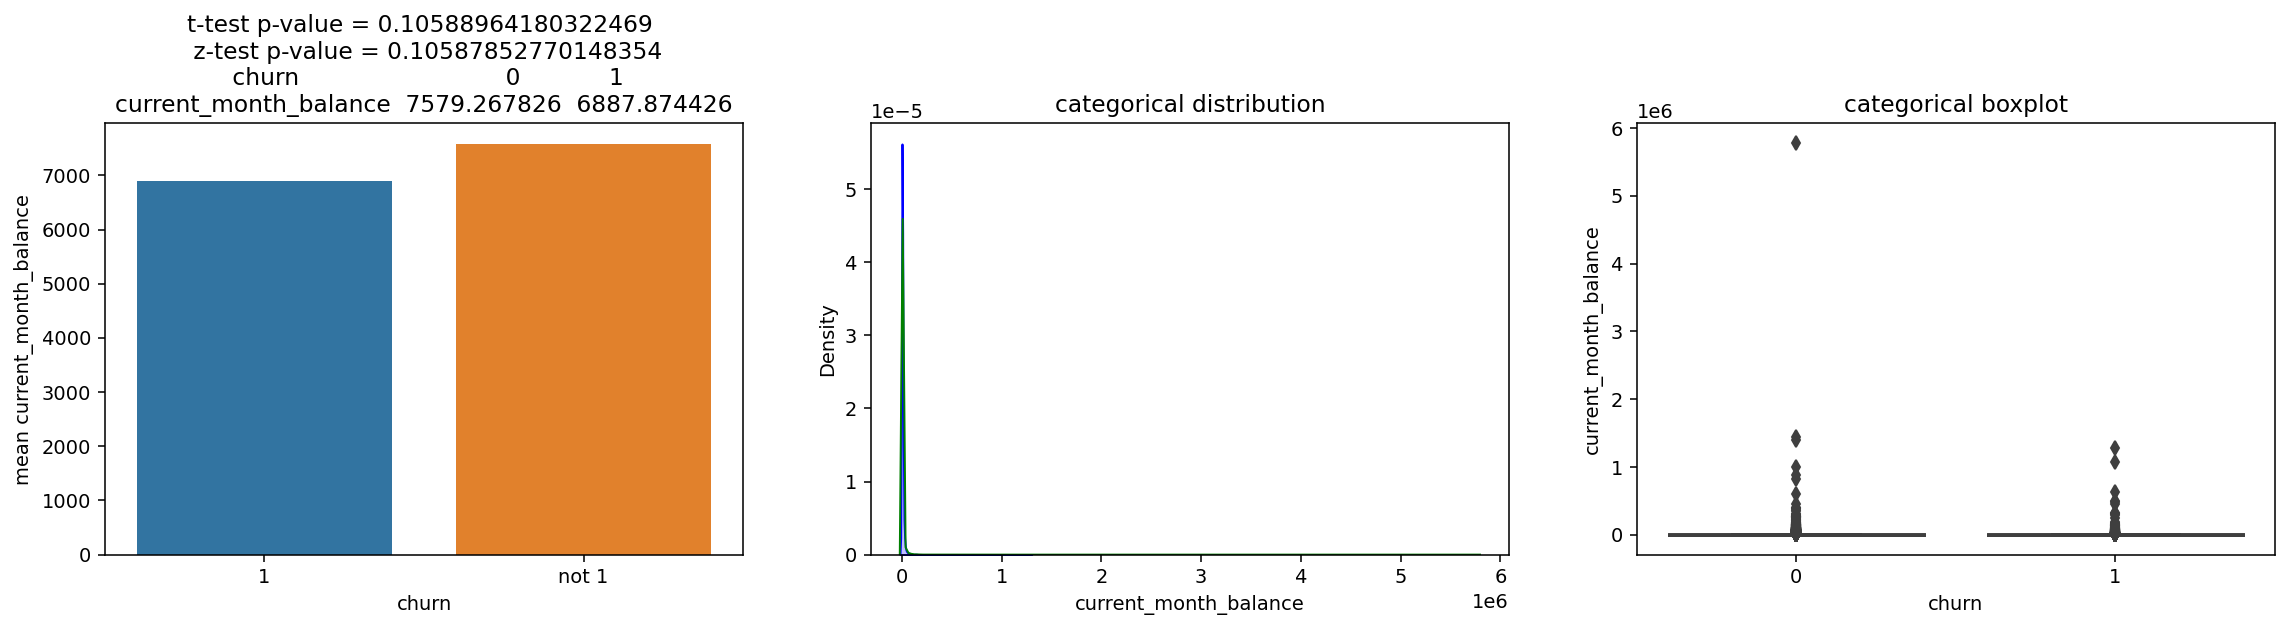

In [19]:
Bivariate_cont_cat(data, 'current_month_balance', 'churn', 1)


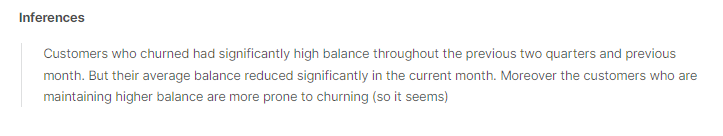

## 6.3 Are customers dropping monthly balance highly likely to churn?

# Extracting drop of balance in previous and current month
difference = data[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']

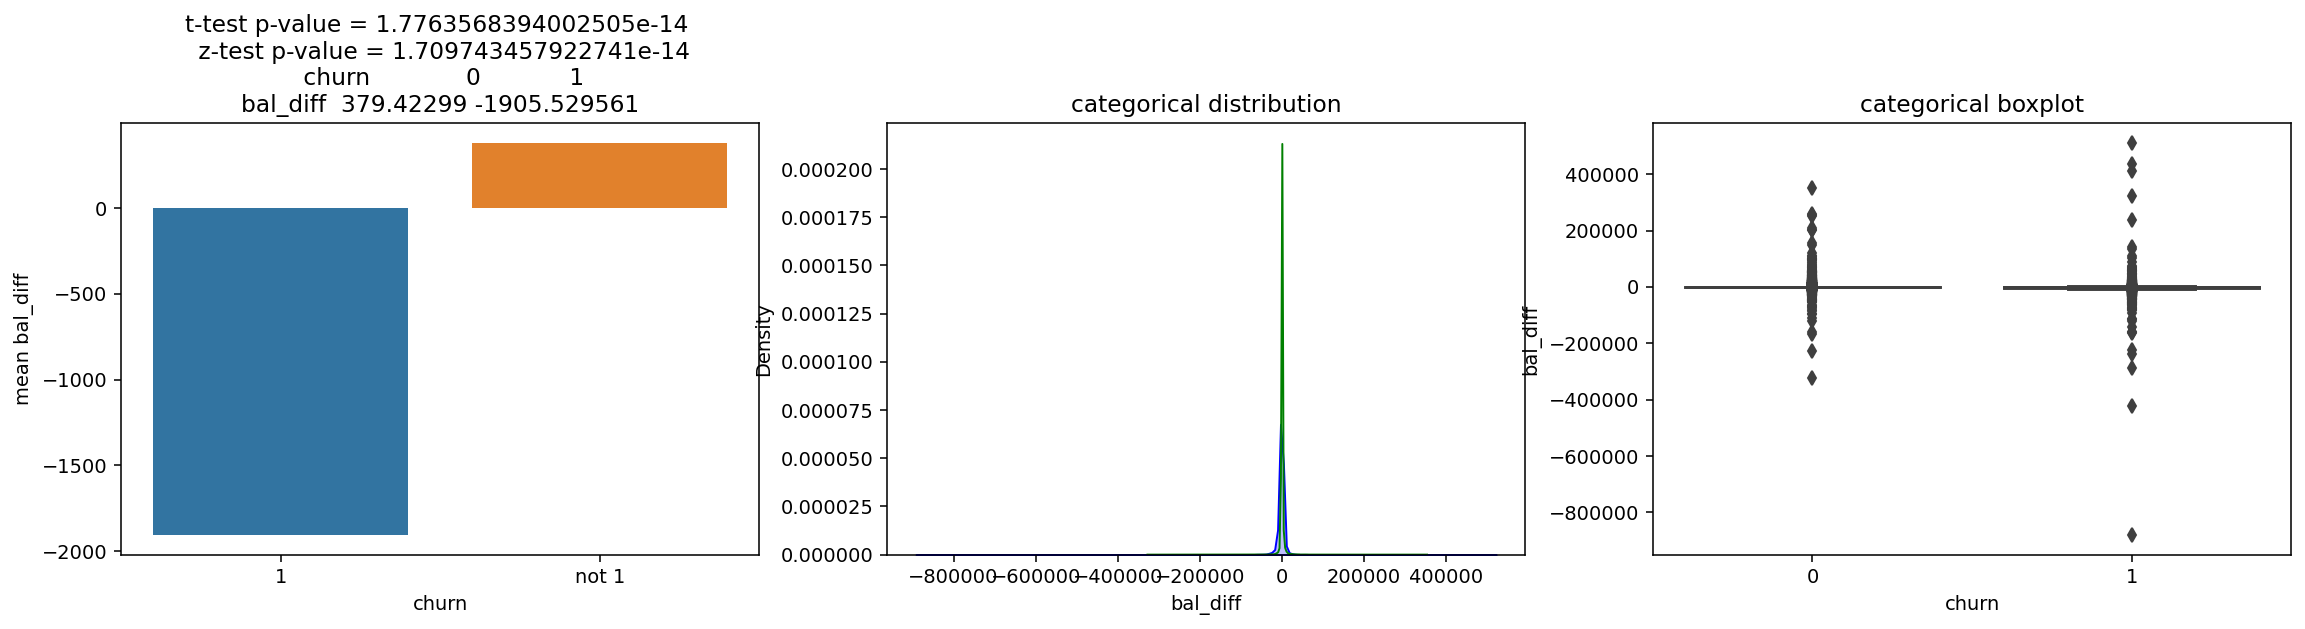

In [21]:
Bivariate_cont_cat(difference, 'bal_diff', 'churn', 1)

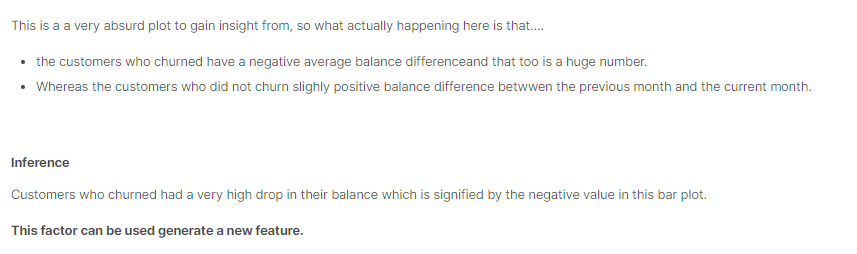

# Bivariate: Categorical Categorical

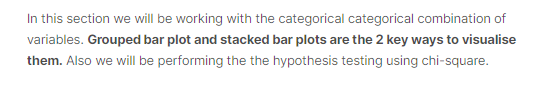

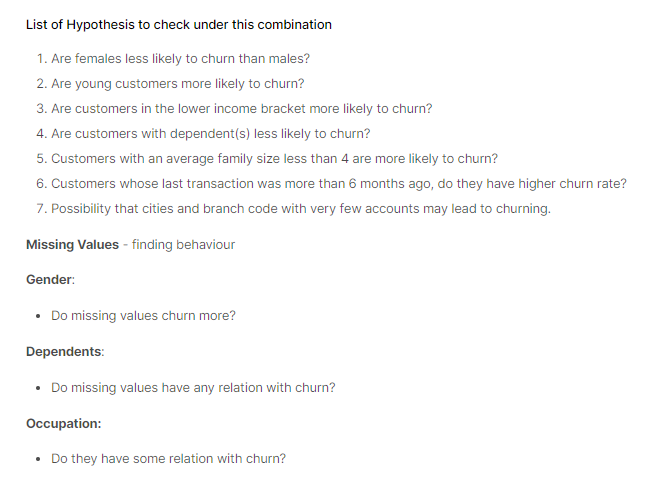

In [22]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

## 1. Are females less likely to churn than males?

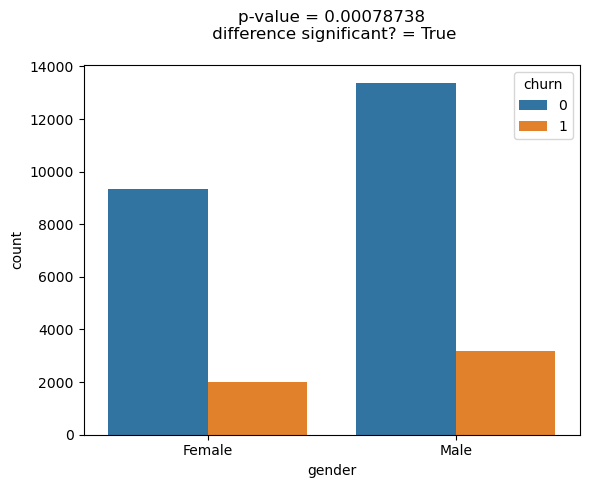

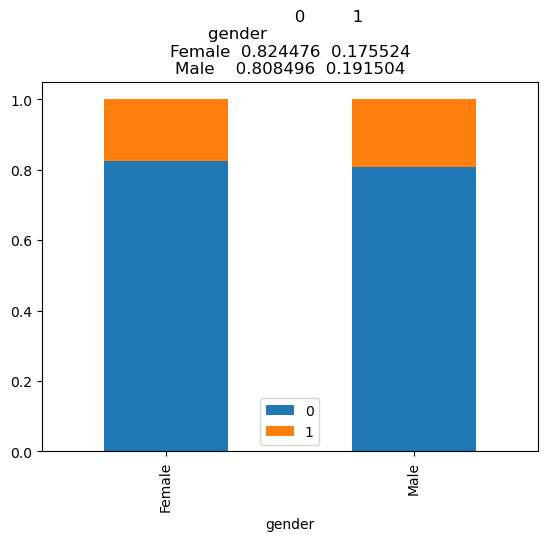

In [23]:
BVA_categorical_plot(data, 'churn', 'gender')

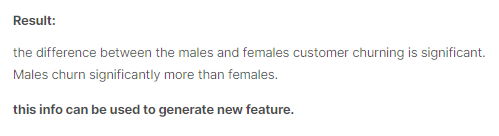

## 2. Are young customers more likely to churn?

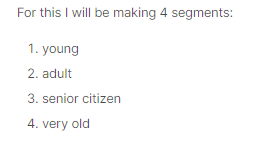

In [24]:
# segregating customers into segments
churn = data[['churn','age']][:]
churn['age_group'] = 'str'
churn['age_group'][churn['age']>=80] = 'very old'
churn['age_group'][(churn['age']<80) & (churn['age']>=60)] = 'senior citizen'
churn['age_group'][(churn['age']<60) & (churn['age']>=18)] = 'adult'
churn['age_group'][churn['age']<18] = 'young'

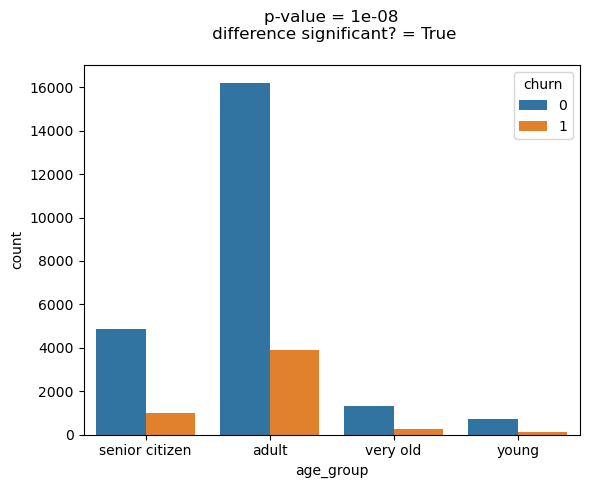

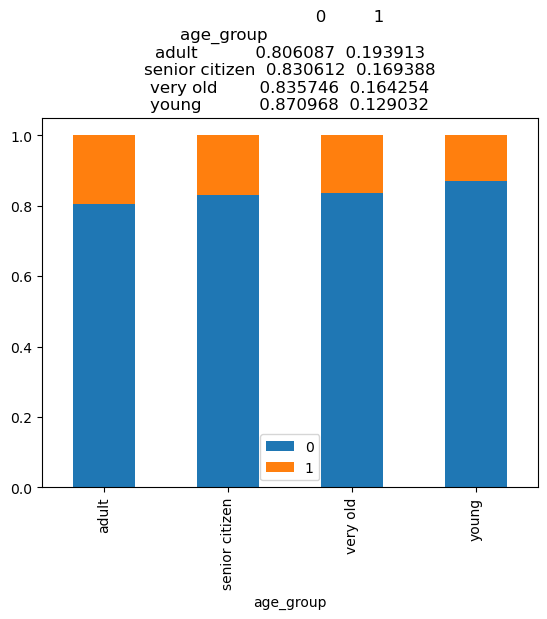

In [25]:
BVA_categorical_plot(churn, 'churn', 'age_group')

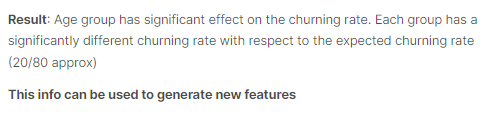

## 3. Customers from low income bracket more likely to churn

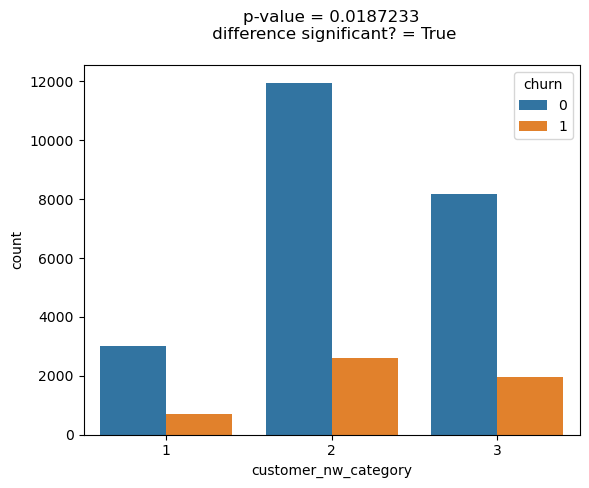

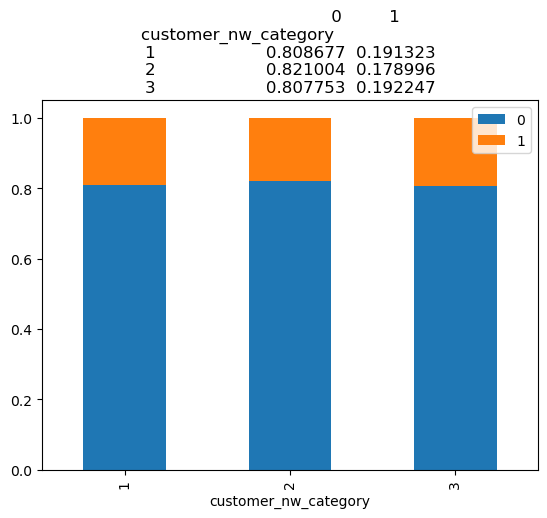

In [26]:
BVA_categorical_plot(data, 'churn', 'customer_nw_category')

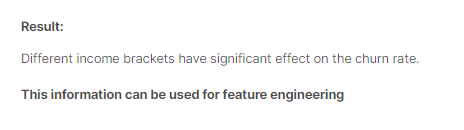

## 4,5. Are customers with dependent(s) less likely to churn?

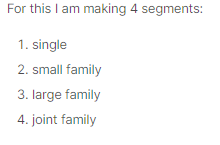

In [27]:
# segregating dependents into categories
dependents = data[['churn','dependents']][:]
dependents.dropna(inplace=True)
dependents['dep_group'] = None
dependents['dep_group'][dependents['dependents']==0] = 'single'
dependents['dep_group'][(dependents['dependents']>=1) & (dependents['dependents']<=3)] = 'small family'
dependents['dep_group'][(dependents['dependents']>=4) & (dependents['dependents']<=9)] = 'large family'
dependents['dep_group'][(dependents['dependents']>=10)] = 'joint family'

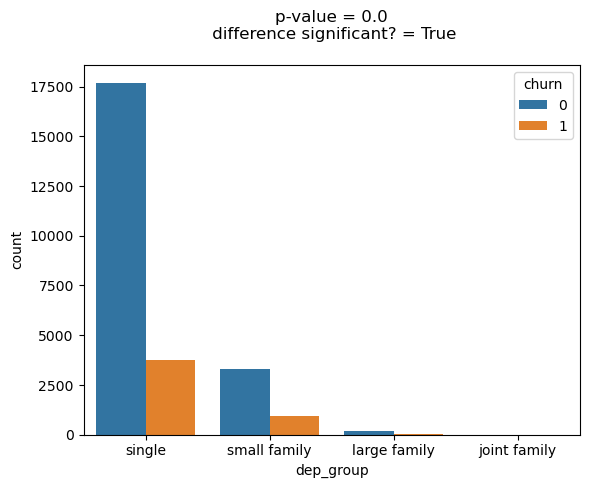

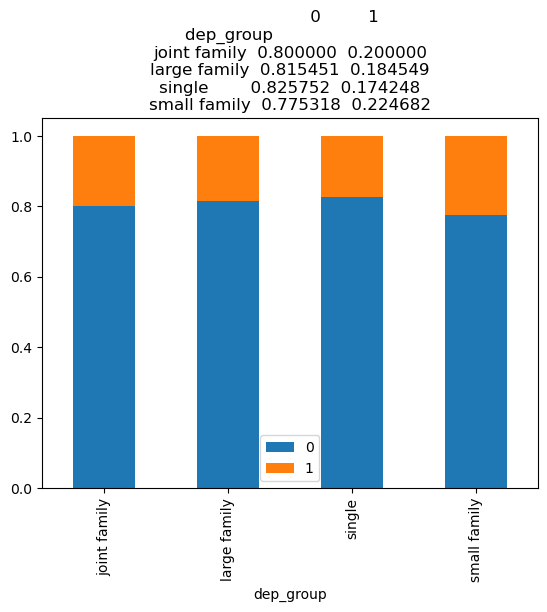

In [28]:
BVA_categorical_plot(dependents, 'churn', 'dep_group')


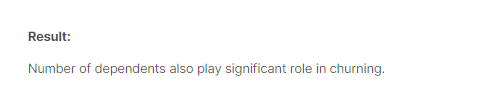

## 7. Possibility that cities and branch code with very few accounts may lead to churning.

### City : Isolating cities with less than 1% of total customers 

In [29]:
# getting city codes which have less than 280 (1%) of accounts
tmp = data['city'].value_counts()[:]
cities = tmp[tmp<280].index

churn_acc = data[['churn','city']][:]
churn_acc['city_cat'] = None
churn_acc['city_cat'][churn_acc['city'].isin(cities[:])] = 'low accounts'
churn_acc['city_cat'][~churn_acc['city'].isin(cities[:])] = 'high accounts'

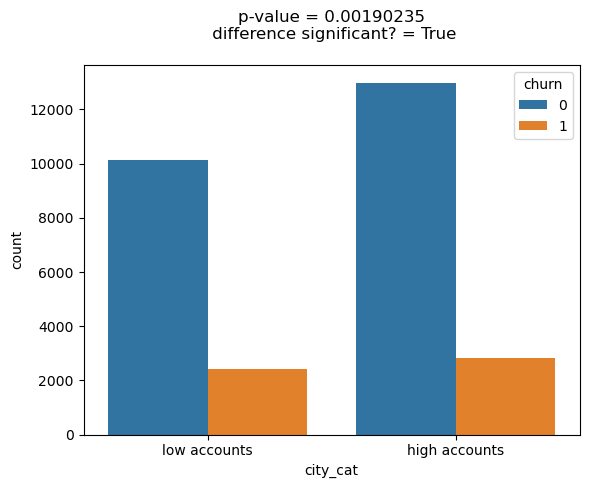

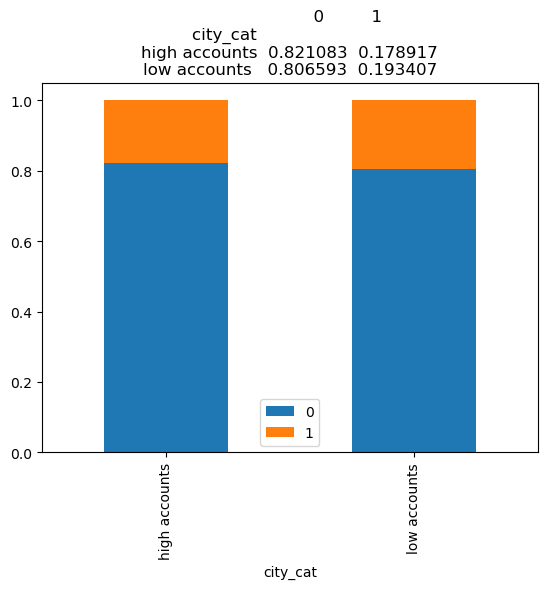

In [30]:
BVA_categorical_plot(churn_acc, 'churn', 'city_cat')

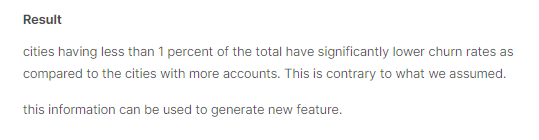

### Branch code: Isolating branches with less than 0.5%of accounts

In [31]:
# getting branch codes with more than 0.5% of total accounts
tmp = data['branch_code'].value_counts()[:]
branch = tmp[tmp<140].index

# making two segments
churn_acc = data[['churn','branch_code']][:]
churn_acc['branch_cat'] = None
churn_acc['branch_cat'][churn_acc['branch_code'].isin(branch[:])] = 'low accounts'
churn_acc['branch_cat'][~churn_acc['branch_code'].isin(branch[:])] = 'high accounts'

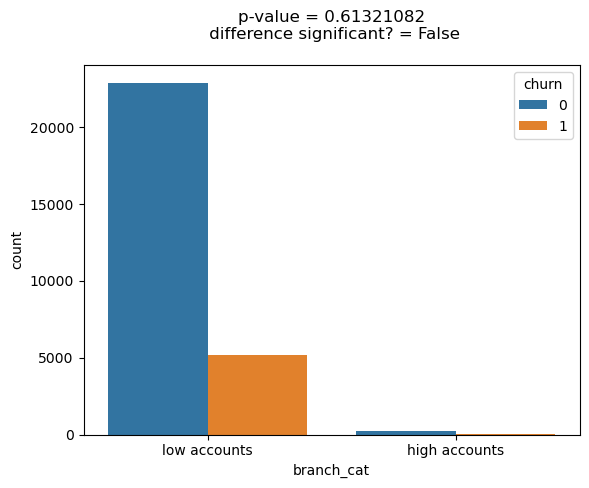

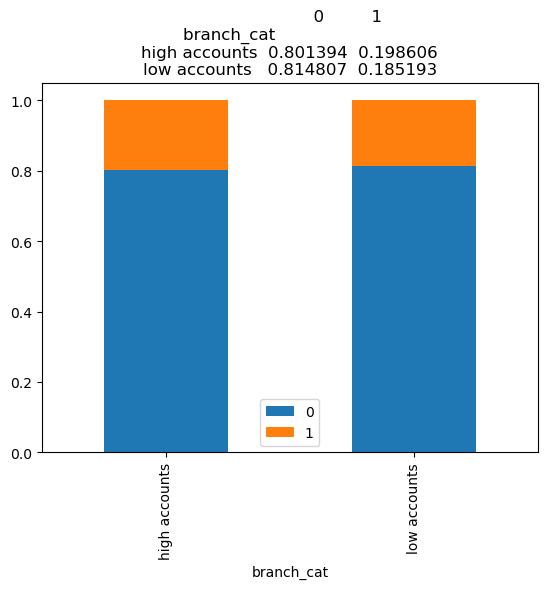

In [32]:
BVA_categorical_plot(churn_acc, 'churn', 'branch_cat')


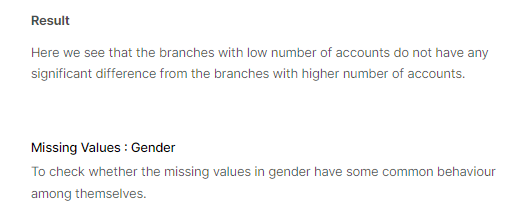

In [33]:
# isolating rows with missing gender
miss_gender = data[:]
miss_gender['missing_gender'] = 'not_missing'
miss_gender['missing_gender'][~miss_gender['gender'].isin(['Male','Female'])] = 'missing value'

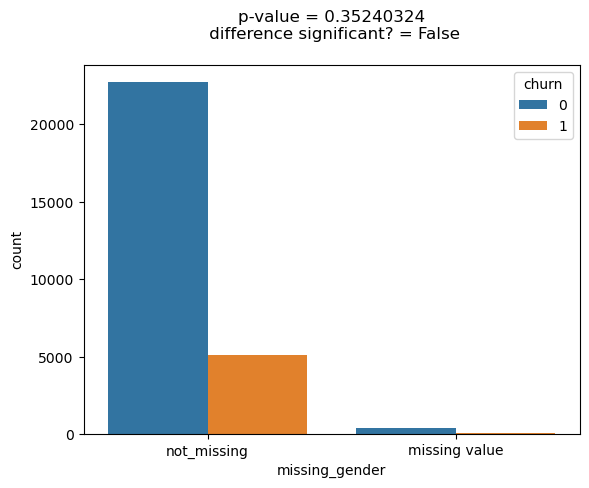

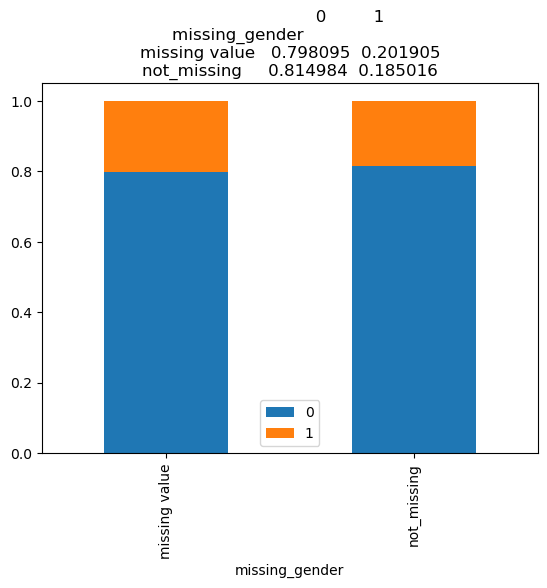

In [34]:
BVA_categorical_plot(miss_gender, 'churn', 'missing_gender')


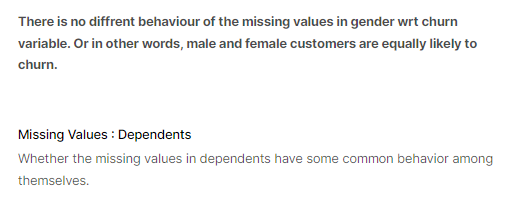

In [35]:
# isolating rows with missing gender
miss_dependents = data[:]
miss_dependents['missing_dependents'] = 'not_missing'
miss_dependents['missing_dependents'][~miss_dependents['dependents'].isin([0, 2, 3, 1, 7, 4,
                                                                           6, 5, 9, 52, 36, 50,
                                                                           8, 25, 32])] = 'missing value'

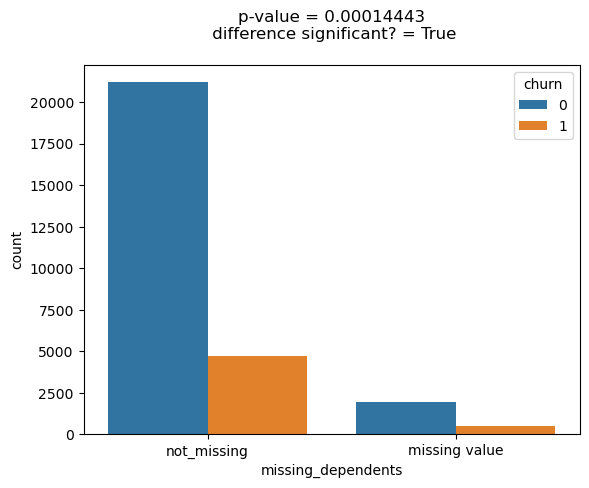

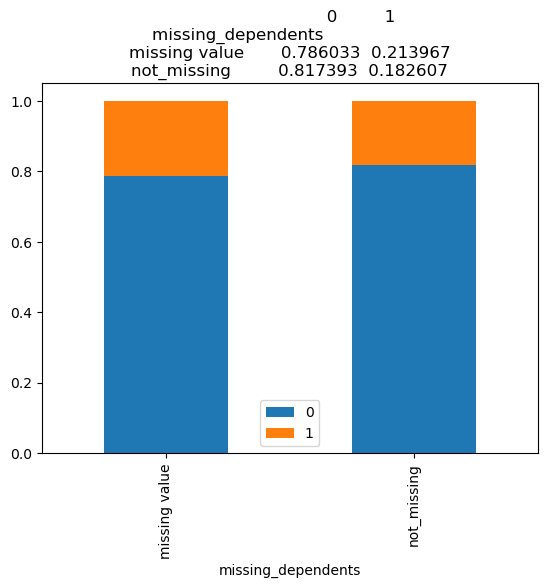

In [36]:
BVA_categorical_plot(miss_dependents, 'churn', 'missing_dependents')

In [37]:
##**Result** the missing values in gender have significantly higher churn rate. We can make a new feature for this

### Missing values : Occupation

In [38]:
# isolating rows with missing gender
miss_occupation = data[:]
miss_occupation['missing_occupation'] = 'not_missing'
miss_occupation['missing_occupation'][~miss_occupation['occupation'].isin(['self_employed',
                                                                           'salaried',
                                                                           'retired',
                                                                           'student',
                                                                           'company'])] = 'missing value'


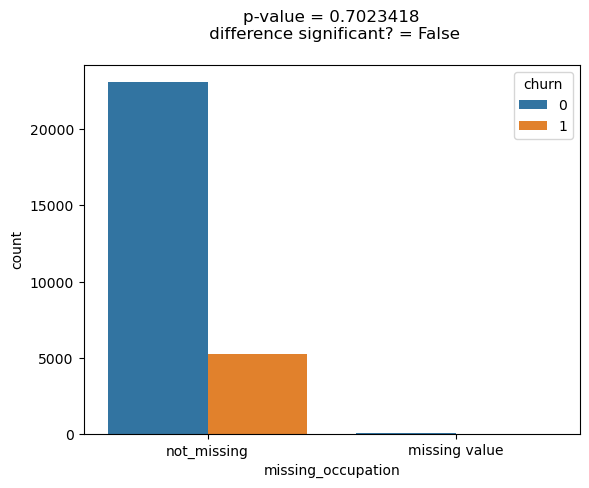

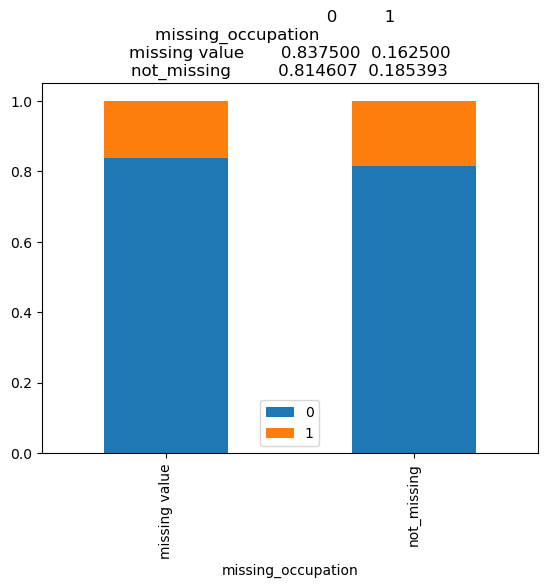

In [39]:
BVA_categorical_plot(miss_occupation, 'churn', 'missing_occupation')

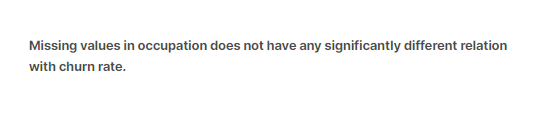

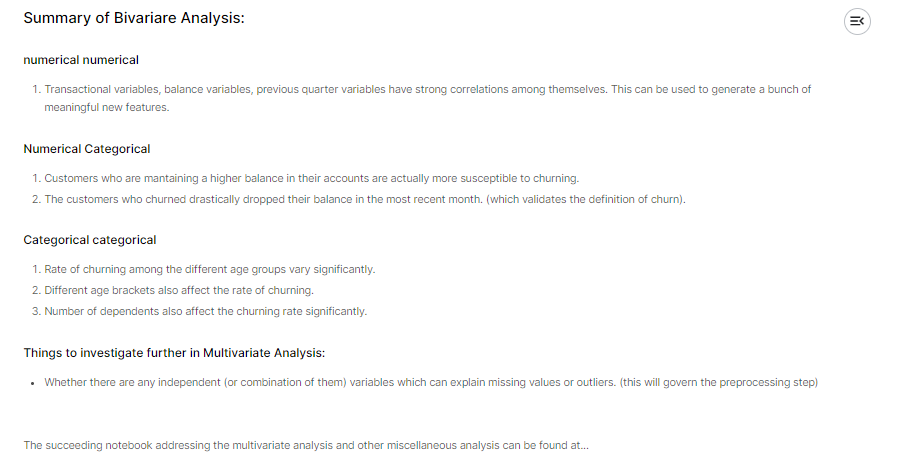